In [1]:
"""
Script to Explore Training Dataset
"""
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re
import matplotlib
from matplotlib import patches
import sys, os
SCRIPT_DIR = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.dirname(os.path.dirname(SCRIPT_DIR)))
from analysis.utils import utils
import dataframe_image as dfi
from PIL import Image
from collections import defaultdict
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
font = {'family' : 'Ubuntu',
        'size'   : 22}
matplotlib.rc('font', **font)
import json
from datetime import datetime

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

EXP_TYPES = ['ASSEMBLESANDWICH', 'GETPLATE', 'OPENFREEZER', 'OPENFRIDGE', 'SLICETOMATO', 'WASHHANDS']
# ACTION_PERIOD = ['grab something', ]
tagId = "0x683f"
regions_fp = Path().joinpath("04_outputs", "REGIONS", "2023-03-14 12:15:31.794149.json")
data_fp = Path().joinpath("04_outputs", "TRAINING", "2023-03-15 10:52:05.866970_W2_S1_training.csv")

data = pd.read_csv(data_fp)

In [2]:
# MARK: - Preprocessing
cleaned_data = (data
                .dropna()
                .reset_index(drop=True)
                .pipe(utils.one_hot_encode_col, 'LOCATION')
            )

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(cleaned_data['ACTIVITY'].values)
cleaned_data['ACTIVITY'] = encoded_y

display(cleaned_data)
categories = label_encoder.classes_
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

,MEAN_POS_X,MEAN_POS_Y,MEAN_POS_Z,MEAN_ACC_X,MEAN_ACC_Y,MEAN_ACC_Z,MEAN_LINACC_X,MEAN_LINACC_Y,MEAN_LINACC_Z,MEAN_GYRO_X,...,MIN_Heading,MIN_Roll,MIN_Pitch,MIN_Pressure,ACTIVITY,LOCATION_counter,LOCATION_dish_cabinet,LOCATION_fridge,LOCATION_kitchen_sink,LOCATION_undefined
0,8665.482813,2969.229688,862.703125,-477.562500,-603.718750,588.437500,6.785156,-10.857422,-7.517578,-25.218750,...,261.4375,-51.8750,29.7500,94845.50,0,1.0,0.0,0.0,0.0,0.0
1,8704.128125,2931.810937,912.851562,-337.218750,-414.750000,684.437500,9.681641,13.513672,13.007812,6.531250,...,251.9375,-44.8125,7.5625,94845.50,0,1.0,0.0,0.0,0.0,0.0
2,8710.020313,2980.846875,904.781250,-619.843750,-110.218750,490.343750,10.978516,36.546875,24.228516,-81.437500,...,238.9375,-87.2500,-177.3125,94848.25,0,1.0,0.0,0.0,0.0,0.0
3,8602.339062,3066.100000,903.173437,-885.687500,-37.843750,-36.968750,12.050781,23.996094,2.484375,-54.250000,...,235.5625,-87.2500,-177.3125,94848.25,0,1.0,0.0,0.0,0.0,0.0
4,8504.479032,3063.985484,822.390323,-873.000000,-102.903226,-274.387097,7.671371,-0.538306,-14.197581,27.741935,...,235.5625,-77.1875,-176.3125,94846.75,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,9495.598387,2979.687683,641.823659,-709.451613,-456.096774,294.451613,21.657258,-0.752016,5.308468,32.548387,...,82.3750,-72.6250,-29.3750,94847.25,6,0.0,0.0,0.0,1.0,0.0
1821,9174.979032,2793.747801,880.549066,-711.806452,83.161290,245.322581,-5.366935,17.245968,12.778226,-5.838710,...,17.8125,-70.8125,-102.5000,94847.25,6,0.0,1.0,0.0,0.0,0.0
1822,9258.122581,2853.839709,1314.616815,-674.967742,475.483871,13.161290,-21.173387,-17.036290,-4.663306,59.548387,...,4.7500,-67.2500,-133.0625,94838.00,6,0.0,1.0,0.0,0.0,0.0
1823,9522.843548,3054.187070,1889.700948,-606.354839,279.387097,112.032258,5.463710,35.955645,-10.548387,70.774194,...,4.7500,-79.2500,-144.5000,94838.00,6,0.0,0.0,0.0,1.0,0.0


{'ASSEMBLESANDWICH': 0, 'GETPLATE': 1, 'OPENFREEZER': 2, 'OPENFRIDGE': 3, 'SLICETOMATO': 4, 'UNDEFINED': 5, 'WASHHANDS': 6}


Data Shape:  (1825, 101) (1825,)
Train Shape:  (1095, 101) (1095,)
Test Shape:  (730, 101) (730,)
0.9945205479452055


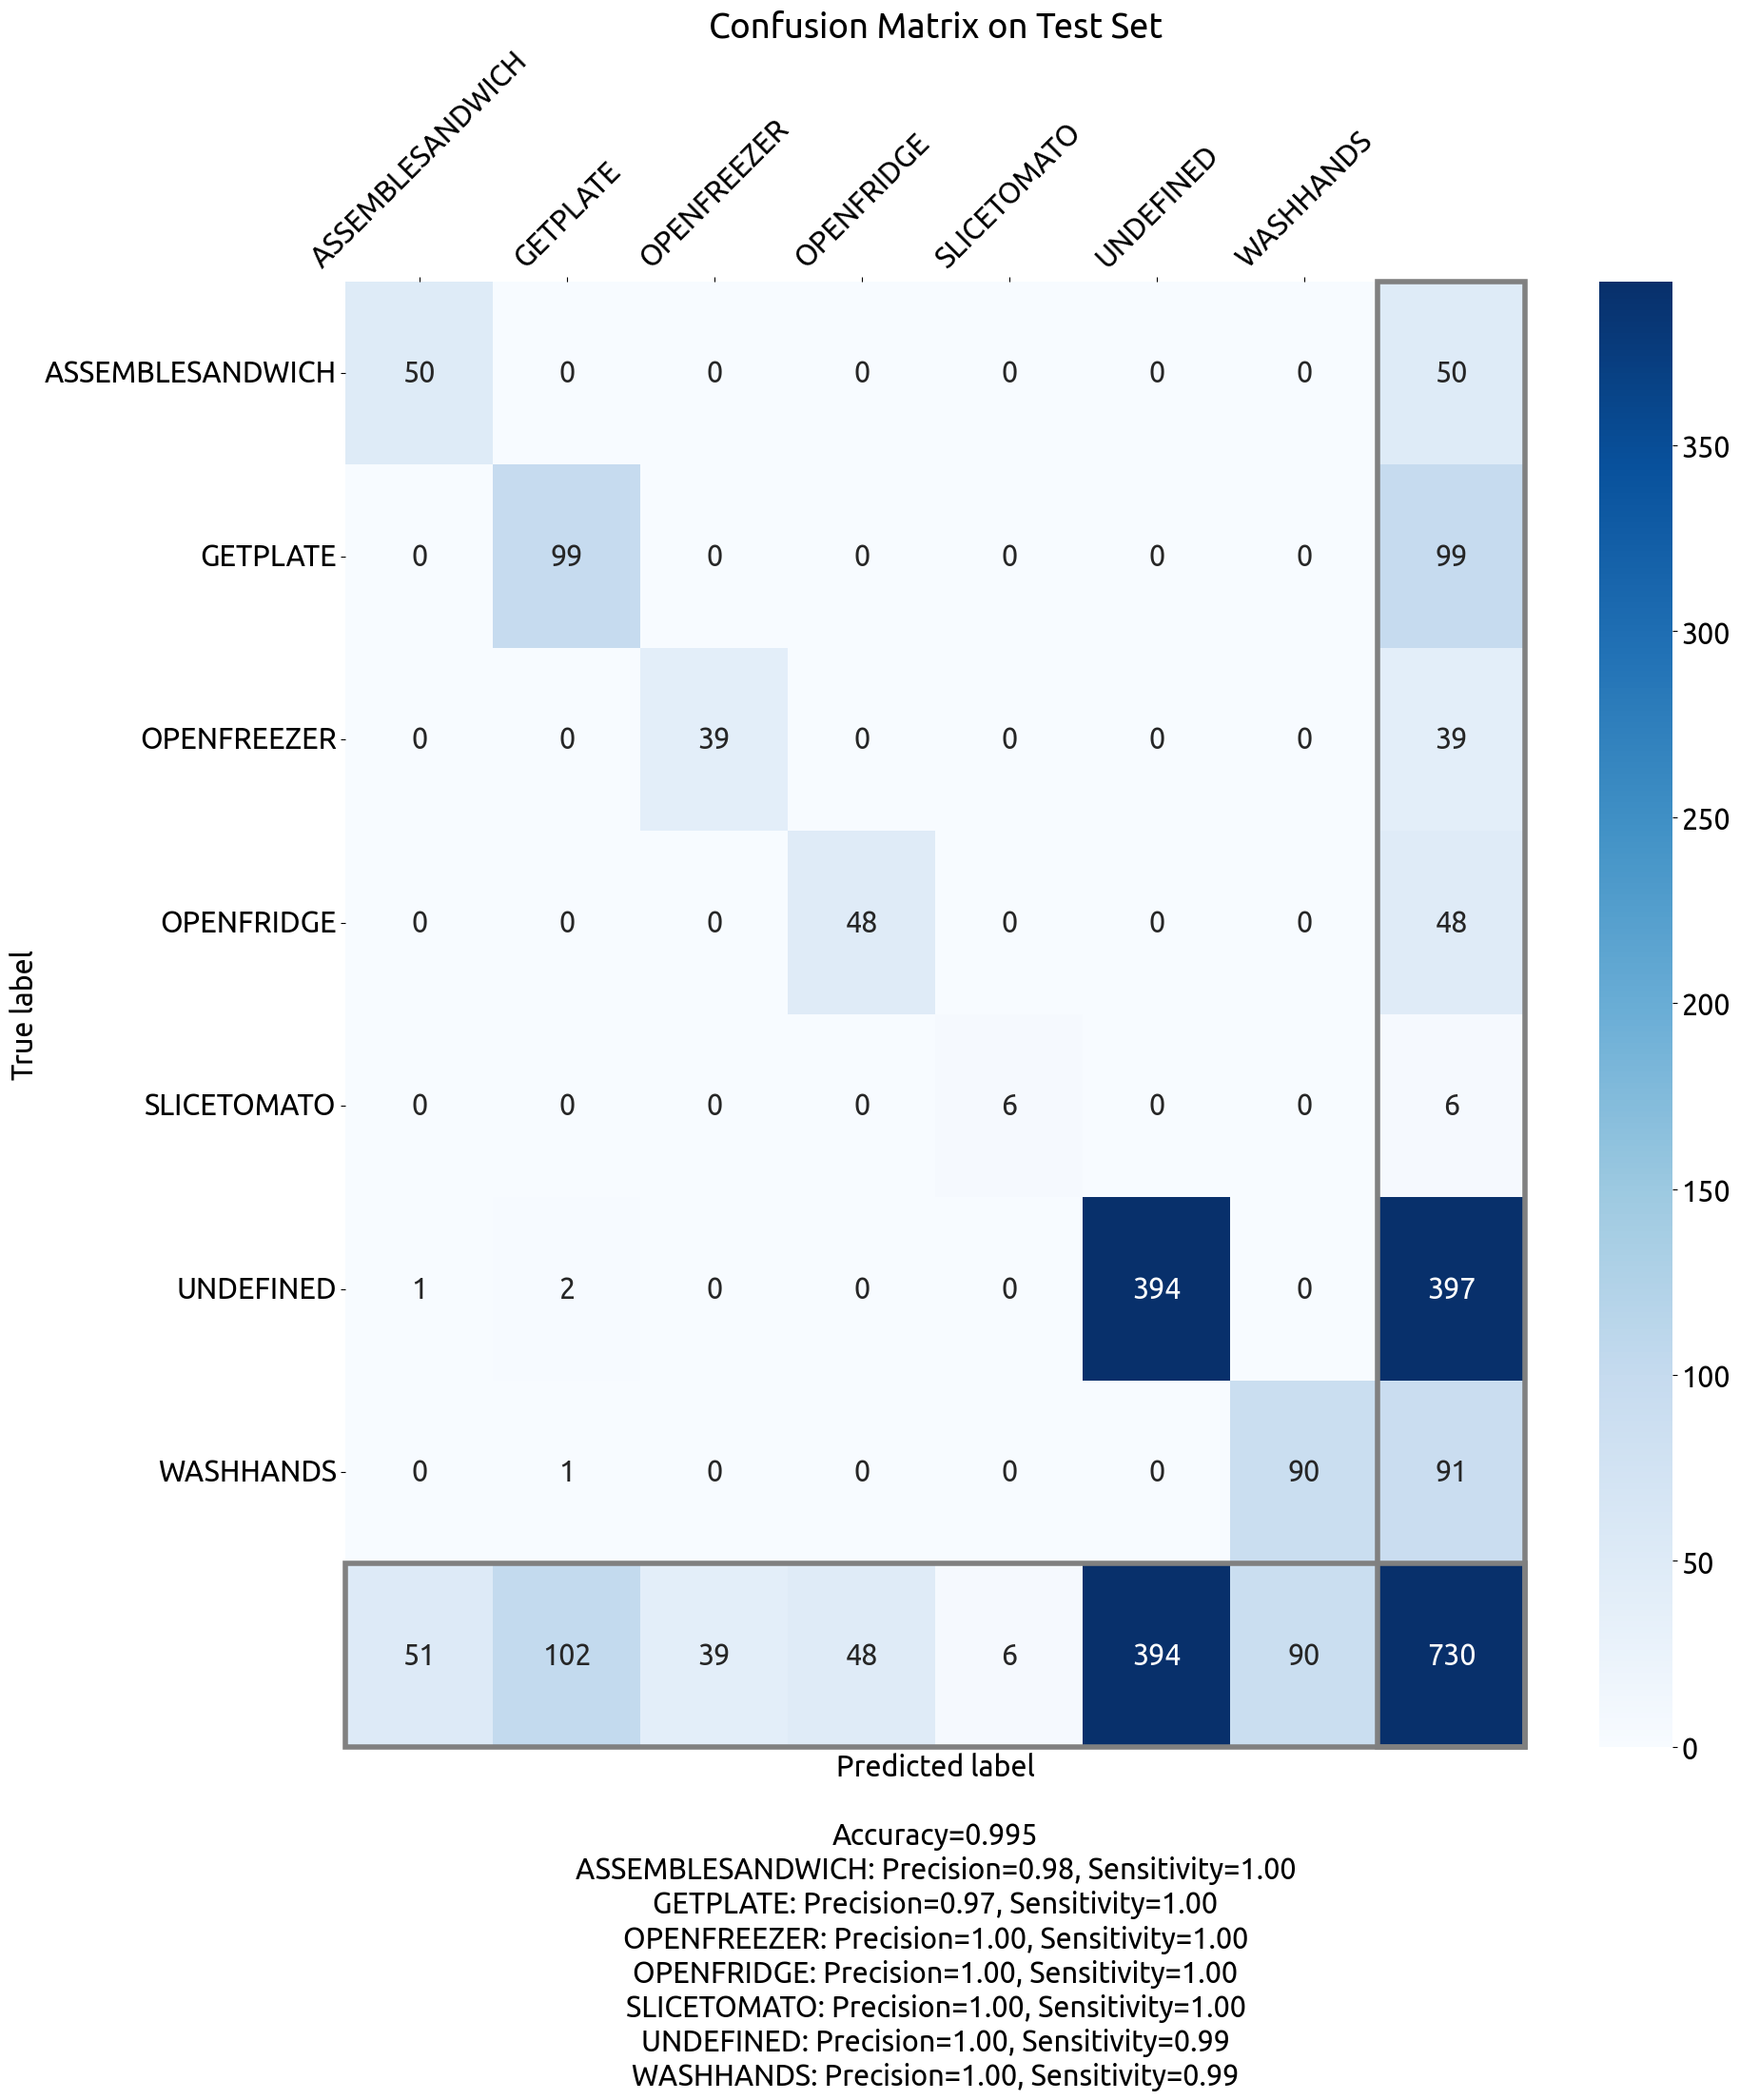

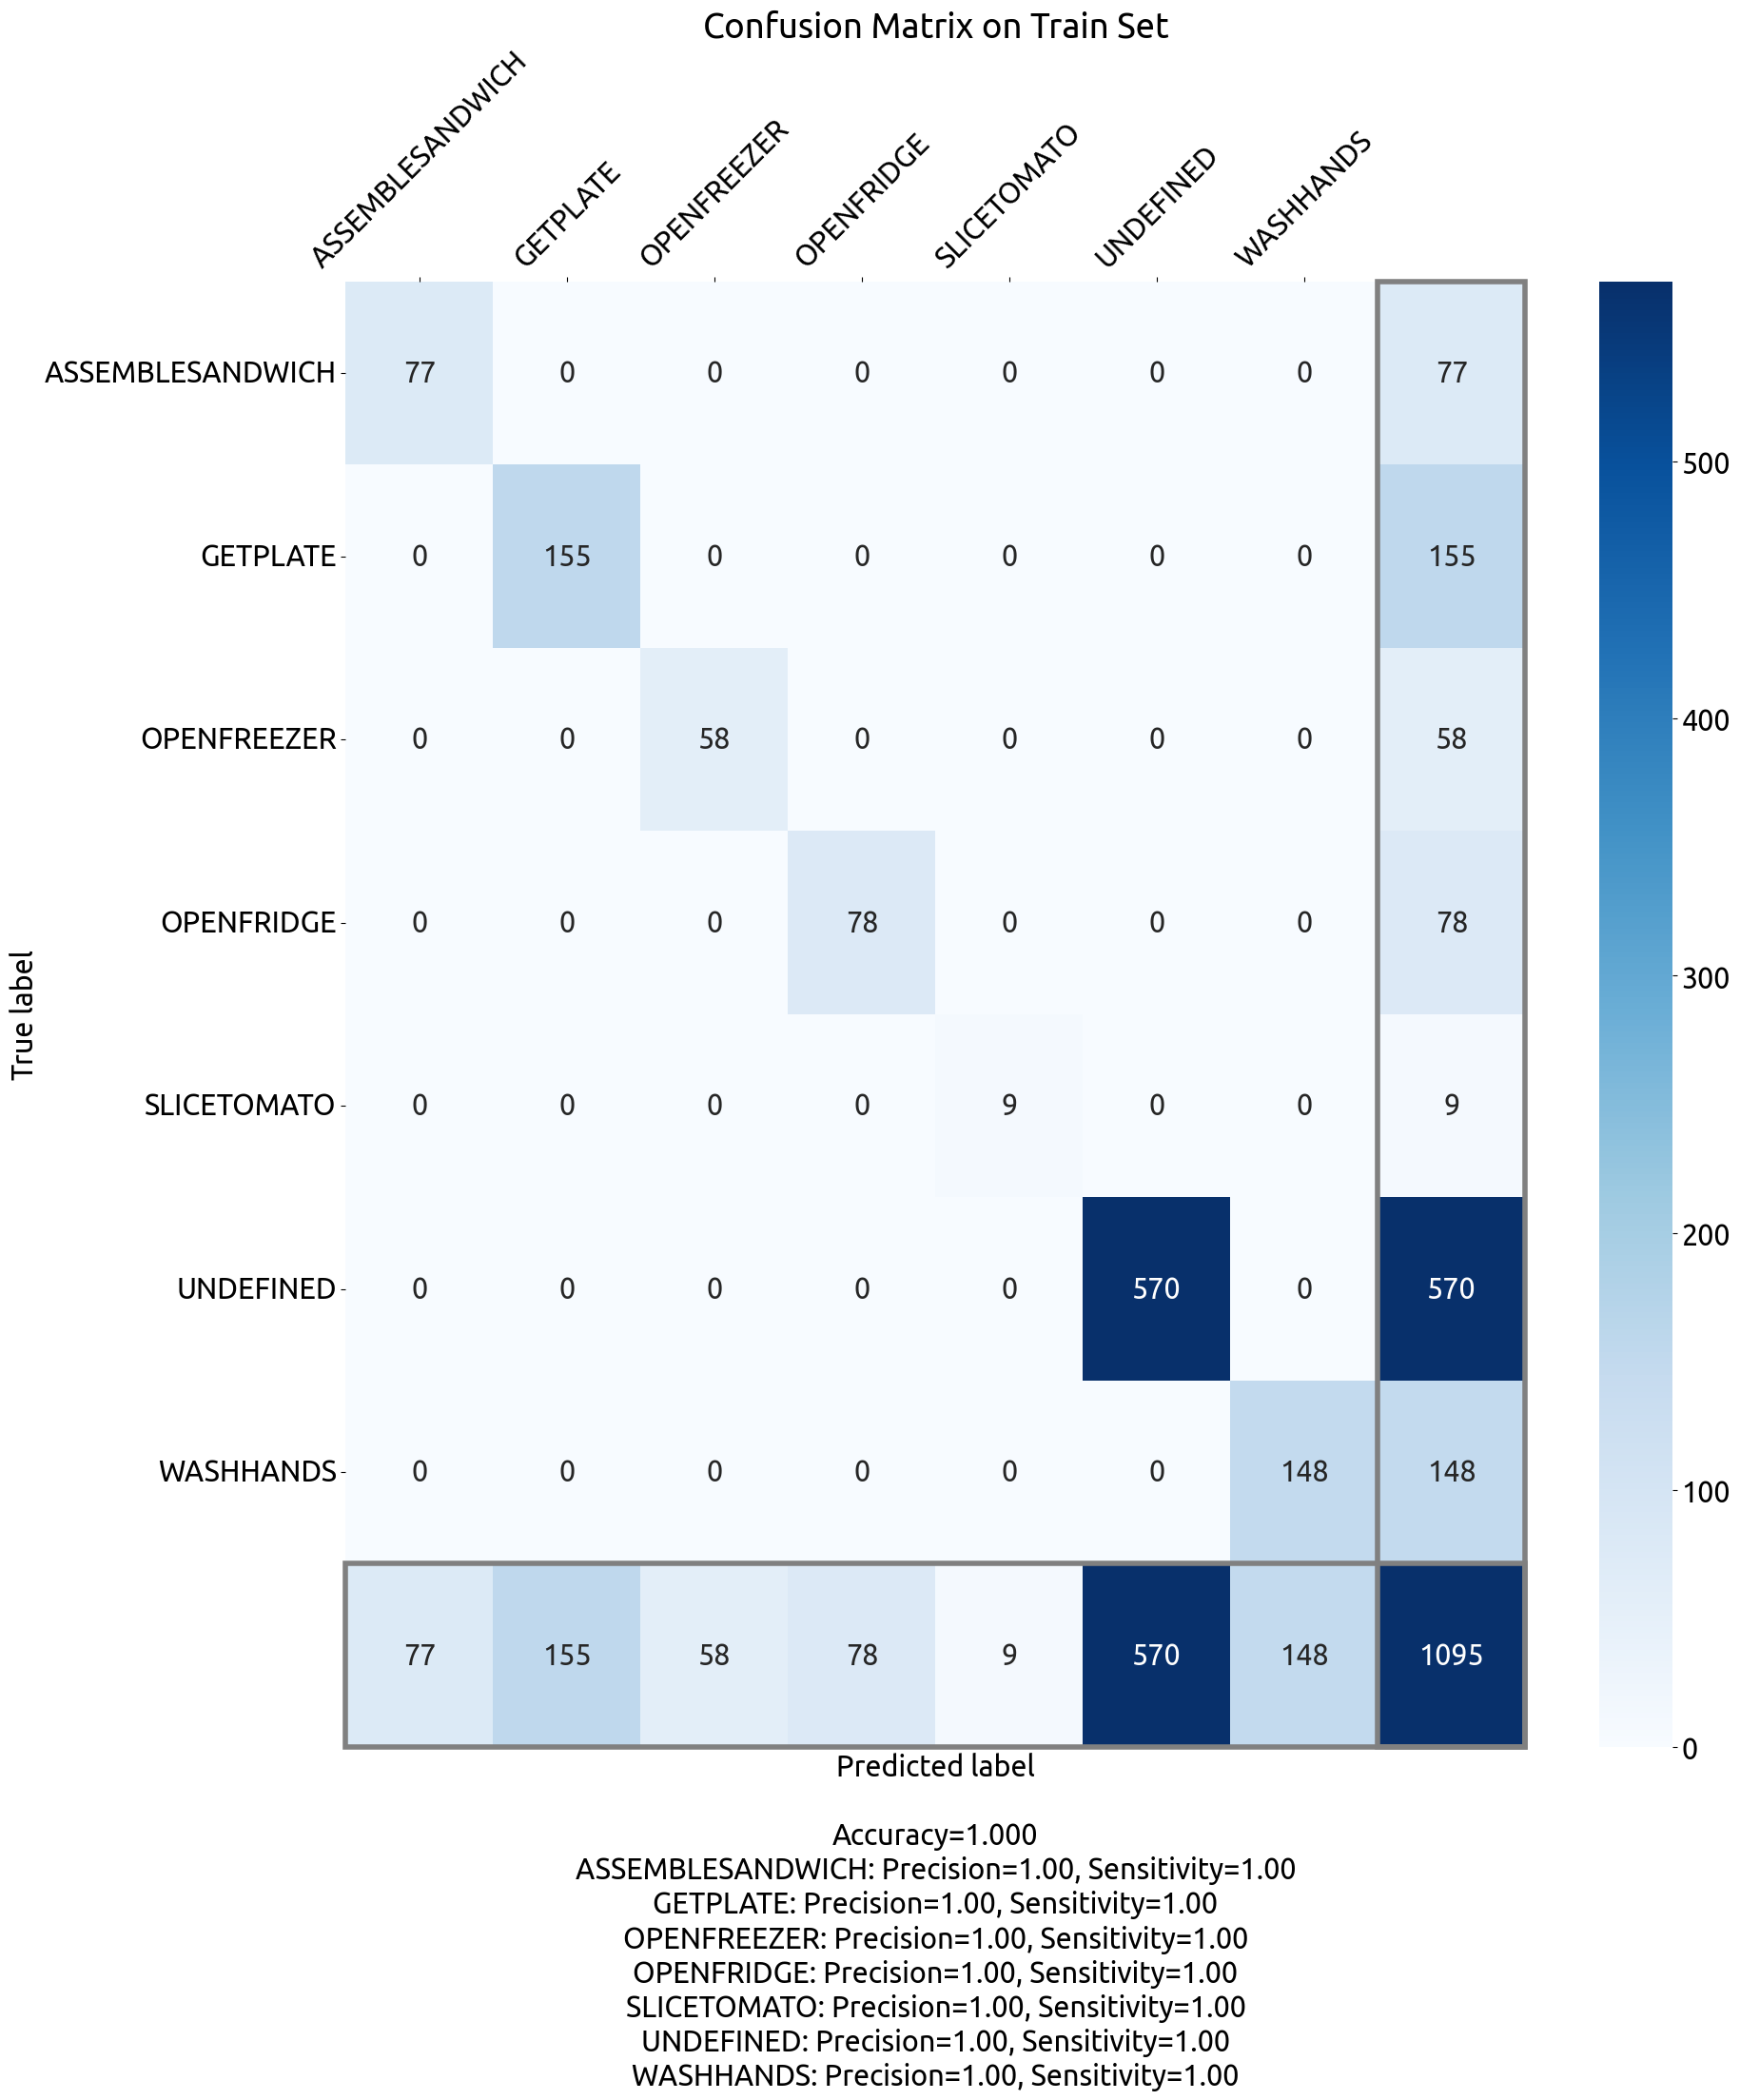

In [5]:
# MARK: - Training
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = cleaned_data.drop('ACTIVITY', axis=1).values
y = cleaned_data.loc[:, 'ACTIVITY'].values

print("Data Shape: ", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0
)

print("Train Shape: ", X_train.shape, y_train.shape)
print("Test Shape: ", X_test.shape, y_test.shape)

clf = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred) 
utils.make_confusion_matrix(cf_matrix, categories=categories, figsize=(20,20), percent=False, title="Confusion Matrix on Test Set")

y_pred = clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred) 
utils.make_confusion_matrix(cf_matrix, categories=categories, figsize=(20,20), percent=False, title="Confusion Matrix on Train Set")
